In [1]:
#Import Mods
import pandas as pd
import numpy as np

import glob

import matplotlib.pyplot as plt

In [26]:
#Grab files from directory and sort them into correct order
files = []
for filename in glob.glob("/lcrc/project/waggle/public_html/private/training_data/waggle_area510/mobotix/thermal/"
                          "*.thermal.celsius.csv"):
    files.append(filename)
files.sort()

In [27]:
#Run through all images and save off minimum temperature for each
temp_min = []
image_count = []
count = 0

for path in files:
    file = pd.read_csv(path)
    count = count + 1
    image_count.append(count)
    image_array = []
    
    
    for i in range(file.size):
        if i >= 6:
            data = file.values[i][0]
            data = data.split(';')
            array = np.array(data)
            array = array.astype(np.float)
            image_array.append(array)
            
    temp_min.append(np.min(image_array))

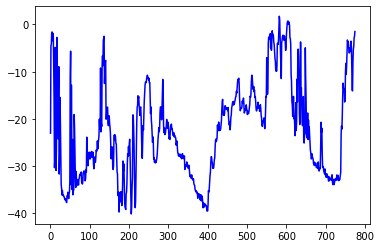

In [28]:
#Plot time series
plt.plot(image_count, temp_min, color='blue')
plt.savefig('Thermal_Time_Series_Second.png')